In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy import signal

%matplotlib inline

font = {'family' : 'sans-serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

In [144]:
loc = 'C:/Users/MichaelDelph/Dropbox (Myomo Inc)/!Engineering/Project Files/Saturn/Battery Validation/Endurance Test/'
# sub_folder = '21Sept2020/'
# sub_folder = '18Sept2020/'
sub_folder = '22Sept2020/'
extnd = '.csv'
# data_file_name = 'TestBat1_Endurance_Device'
# ard_file_name = 'TestBat1_Endurance_HBridge'
# data_file_name = 'TestBat2_Endurance_Device'
# ard_file_name = 'TestBat2_Endurance_HBridge'


##### Hold Pos #######
# data_file_name = 'TestBat1_HoldPos_Device'
# ard_file_name = 'TestBat1_HoldPos_HBridge'

# data_file_name = 'TestBat2_HoldPos_Device'
# ard_file_name = 'TestBat2_HoldPos_HBridge'

data_file_name = 'EngBat2_HoldPos_Device'
ard_file_name = 'EngBat2_HoldPos_HBridge'

data_file_name = 'EngBat3_HoldPos_Device'
ard_file_name = 'EngBat3_HoldPos_HBridge'


####Current Batteries ####
# data_file_name = 'EngBat2_Endurance_Device'
# ard_file_name = 'EngBat2_Endurance_HBridge'
# data_file_name = 'EngBat3_DeviceLog'
# ard_file_name = 'EngBat3_HBridge'

data_input_file  = loc + sub_folder + data_file_name + extnd
ard_input_file = loc + sub_folder + ard_file_name + extnd
df_raw_device = pd.read_csv(data_input_file, header=0, dtype=np.float64)
ard_raw_device = pd.read_csv(ard_input_file, header=0, dtype=np.float64)
print (df_raw_device.columns)
print (ard_raw_device.columns)


##### Device Params #####
dev_time = df_raw_device['dev_time'].values
dev_time = dev_time - dev_time[0]
dev_time = dev_time/60
# dev_cycles = df_raw_device['cycles'].values
dev_current_draw = df_raw_device['amps'].values
dev_mot_temp = df_raw_device['mot_temp'].values
dev_bat_health = df_raw_device['bat_health'].values
dev_bat_temp = df_raw_device['bat_temp'].values
# dev_bat_health = dev_bat_health *100

dev_SP = df_raw_device['SP'].values
dev_input = df_raw_device['input'].values

##### Arduino Params ######
ard_time = ard_raw_device['h_time'].values
ard_time = ard_time - ard_time[0]
ard_time = ard_time/1000
ard_time = ard_time/60
ard_hbridge_temp = ard_raw_device['h_temp'].values
ard_hbridge_temp = (ard_hbridge_temp * 1.8) + 32

print(len(ard_time))
# print(dev_current_draw)

# print(dev_bat_health)

max_cycle = dev_cycles[len(dev_cycles)-1]
# print(max_cycle)
max_cycle = str(max_cycle)
print(max_cycle)

Index(['dev_time', 'SP', 'input', 'mode', 'duty', 'mot_temp', 'amps',
       'bat_health', 'bat_temp'],
      dtype='object')
Index(['h_time', 'h_temp'], dtype='object')
2071
nan


Text(0.5, 0, 'Time [min]')

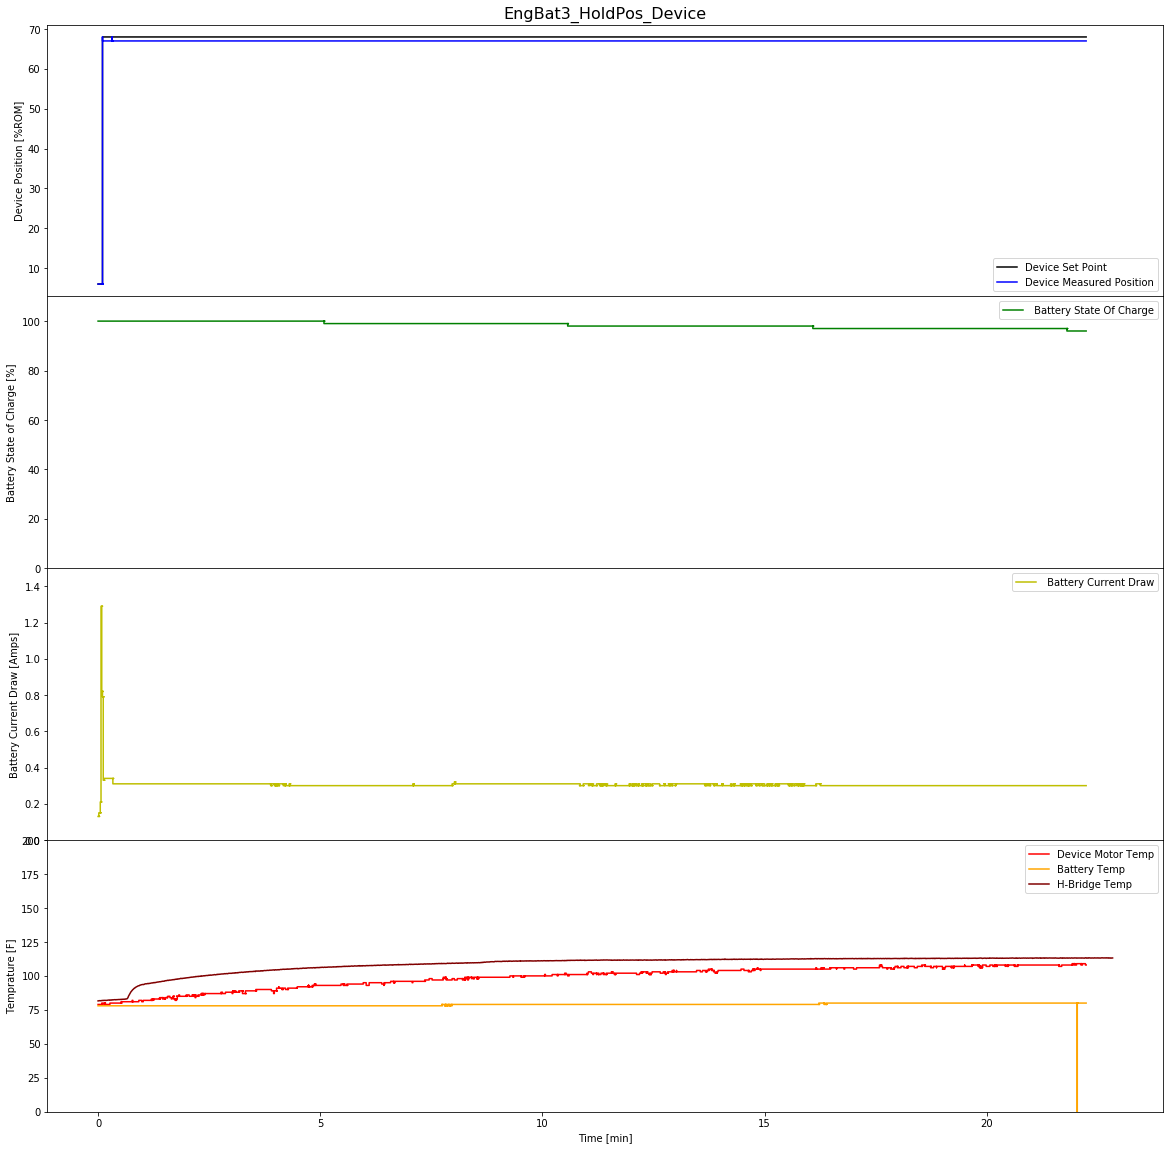

In [145]:
fig, axs = plt.subplots(4, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
fig.set_figheight(20)
fig.set_figwidth(20)

axs[0].plot(dev_time, dev_SP, color = 'black', label = 'Device Set Point')
axs[0].plot(dev_time, dev_input , color = 'blue', label = 'Device Measured Position')
axs[0].set_xlabel('Time [min]')
axs[0].set_ylabel('Device Position [%ROM]')
axs[0].set_title(data_file_name, fontsize=16)
# axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
# axs[0].set_ylim(0, 3)
axs[0].legend()

axs[1].plot(dev_time, dev_bat_health , color = 'g', label = ' Battery State Of Charge')
# axs[0].set_title(data_file_name, fontsize=16)
axs[1].set_ylabel('Battery State of Charge [%]')
axs[1].set_ylim(0, 110)
# axs[0].set_xlim(2.1,2.15)
axs[1].legend()

axs[2].plot(dev_time,dev_current_draw , color = 'y', label = ' Battery Current Draw')
axs[2].set_ylabel('Battery Current Draw [Amps]')
# axs[1].set_title(device_file_name, fontsize=16)
axs[2].set_ylim(0, 1.5)
# axs[0].set_xlim(2.1,2.15)
axs[2].legend()

axs[3].plot(dev_time, dev_mot_temp, color = 'r',label = 'Device Motor Temp' )
axs[3].plot(dev_time, dev_bat_temp, color = 'orange',label = 'Battery Temp' )
axs[3].plot(ard_time,ard_hbridge_temp, color = 'maroon', label = 'H-Bridge Temp' )
# axs[2].plot(t_current,Motor_temp, color = 'coral', label = 'External Motor Temp')
# axs[2].plot(t_current,highLim_bar, '--r')
axs[3].set_ylabel('Temprature [F]')
# axs[1].set_yticks(np.arange(0.1, 1.0, 0.2))
axs[3].set_ylim(0, 200)
axs[3].legend()
axs[3].set_xlabel('Time [min]')


# axs[3].plot(t_current, motor_current, color = 'gold', label = ' Motor Current')
# axs[3].plot(t_device,bat_current, '--', color =  'orange', label = 'Battery Current')
# axs[3].set_xlabel('Time [min]')
# axs[3].set_ylabel('Battery Current [Amps]')
# # axs[2].set_yticks(np.arange(-0.9, 1.0, 0.4))
# axs[3].set_ylim(0, 3)
# axs[3].legend()